xg shape (500,)


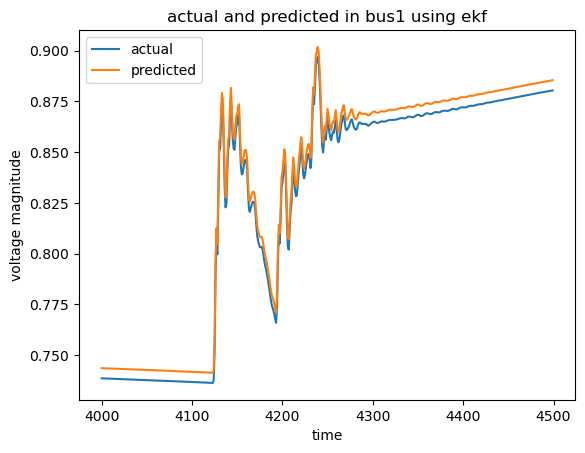

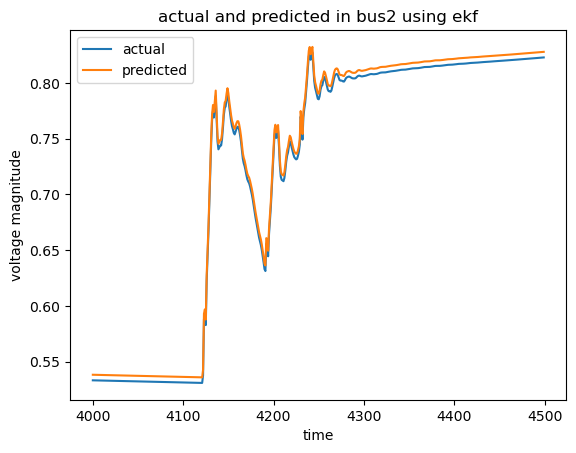

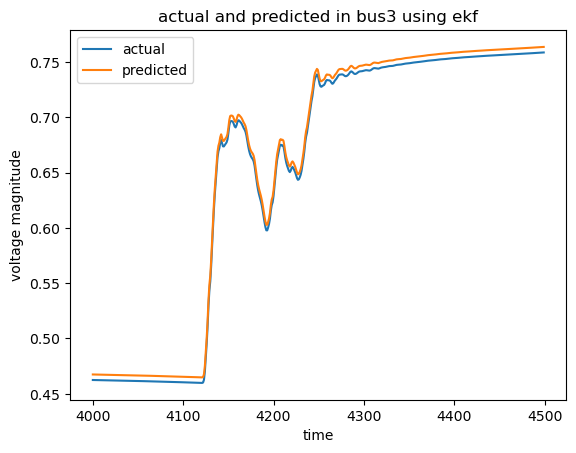

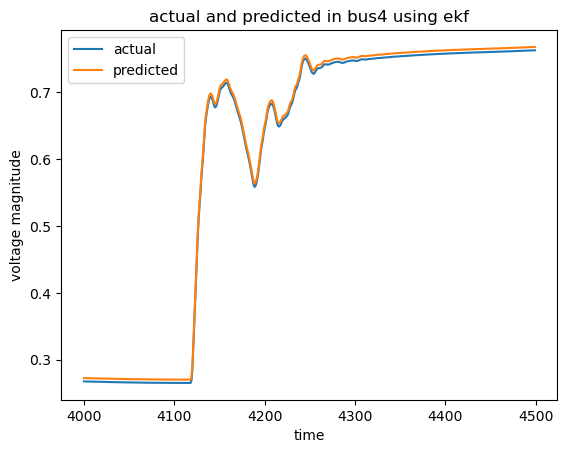

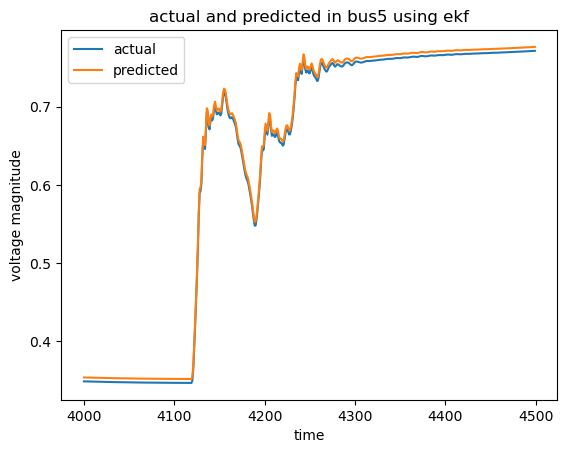

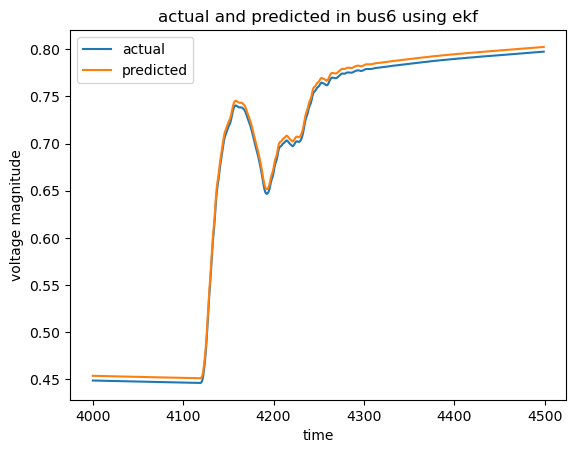

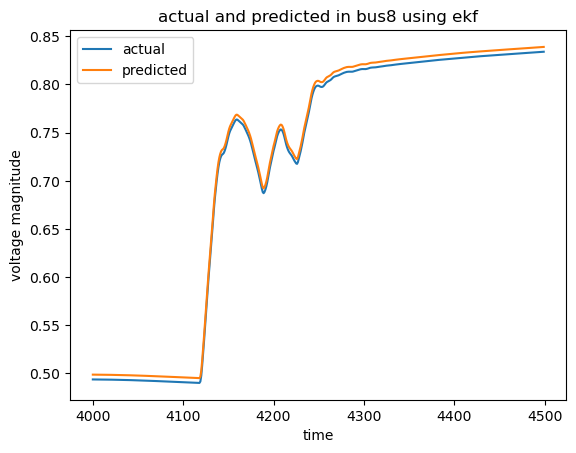

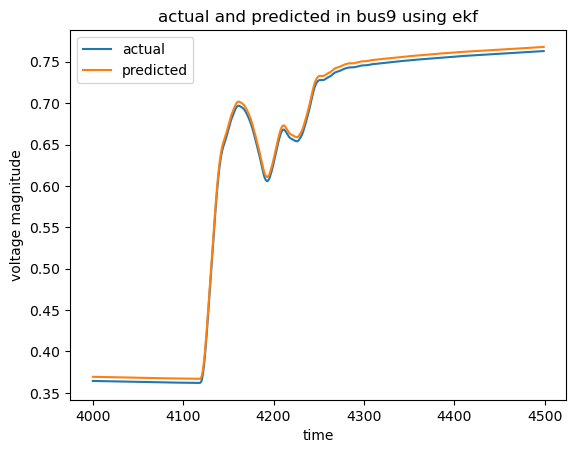

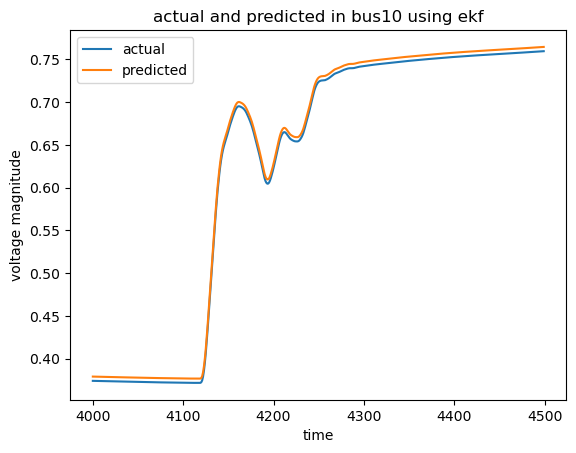

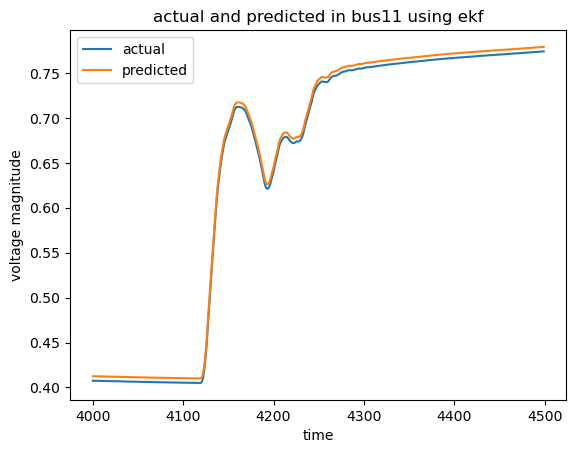

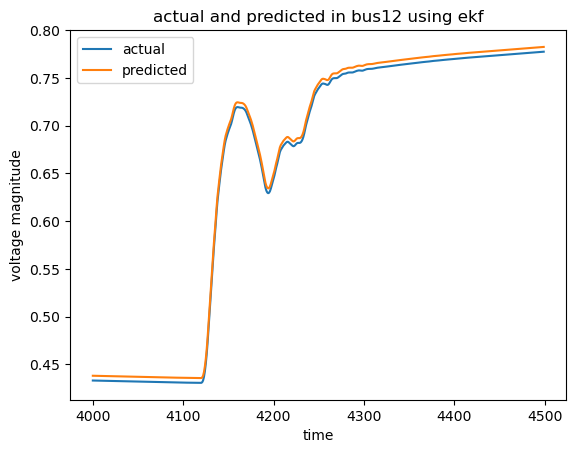

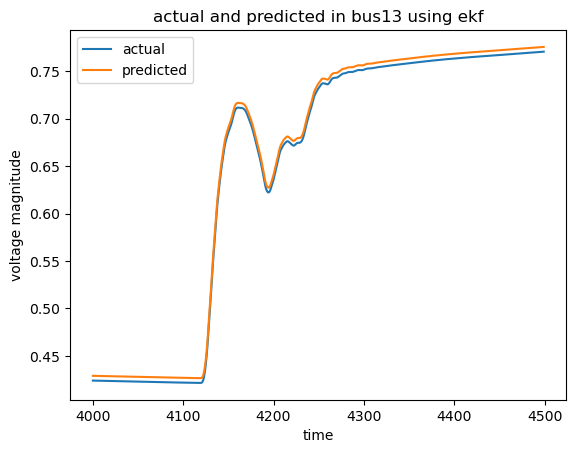

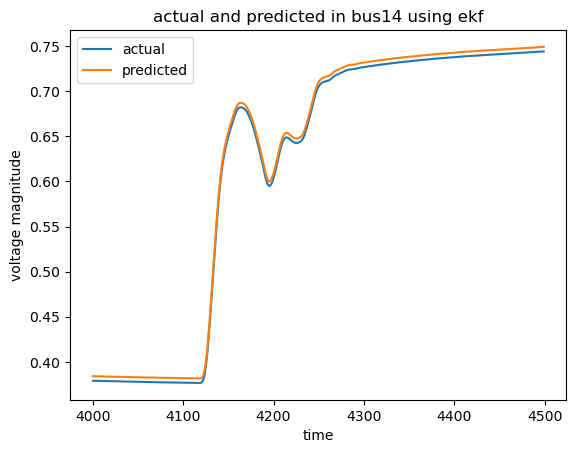

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import random

Pi= pd.read_csv("data/PQ_fault_modified1.csv")
df=pd.read_csv("data/Vrms_fault1.csv")


y_g=[]
y_error=[]
y_actual=[]
y_per_error=[]
# y_modified=[]

for i2 in range(14):
    y_g.append([])
    y_error.append([])
    y_actual.append([])
    y_per_error.append([])
    # y_modified.append([])
begin=4000
end=4500
x_g=np.arange(begin, end)
print("xg shape",x_g.shape)
for i1 in range(0,14):
    if(i1==6):
        continue
    y_actual[i1]=df[f'Subsystem #1|CTLs|Vars|Vrms_{i1+1}'].iloc[begin:end]
    y_actual[i1]/=11
    
    
    mu=0.005
    sigma=0.000001
    noise = np.random.normal(mu, sigma, len(y_actual[i1]))
    noise1= np.random.normal(mu*15, sigma, 60)
    noise2= np.random.normal(mu*9, sigma, 20)
    noise3= np.random.normal(mu*5, sigma, 20)
    noise4= np.random.normal(mu*2, sigma, 20)
    y_modified=y_actual[i1]+noise
    bp=1111-begin
    if(bp>=0):
        ep=bp+len(noise1)
        y_modified[bp:ep]+=noise1
        bp=ep
        ep+=len(noise2)
        y_modified[bp:ep]+=noise2
        bp=ep
        ep+=len(noise3)
        y_modified[bp:ep]+=noise3
        bp=ep
        ep+=len(noise4)
        y_modified[bp:ep]+=noise4
    plot.plot(x_g,y_actual[i1],label=f"actual")
    plot.plot(x_g,y_modified,label=f"predicted")
    ax=plot.gca()
    # ax.set_ylim(0.50,1.50)
    plot.title(f'actual and predicted in bus{i1+1} using ekf')
    plot.xlabel('time')
    plot.ylabel('voltage magnitude')
    plot.legend()
    plot.show()